In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties

import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
data = {
    'Age': {
        'labels': ['Younger adults (18 - 35 years old)', 'Middle-aged adults (36 - 55 years old)', 'Older adults (>55 years old)'],
        'sizes': [599, 790, 1028]
    },
    'Sex': {
        'labels': ['Male', 'Female'],
        'sizes': [1075, 1342]
    },
    'Race': {
        'labels': ['White', 'Black', 'Others', 'Hispanic/Latino', 'Asian'],
        'sizes': [2047, 160, 136, 49, 25]
    },
    'Marital Status': {
        'labels': ['Married', 'Single', 'Widowed', 'Divorced'],
        'sizes': [1149, 916, 174, 159]
    },
    'Language': {
        'labels': ['English', 'Others'],
        'sizes': [2349, 68]
    },
    'Insurance': {
        'labels': ['Medicare', 'Medicaid', 'Others'],
        'sizes': [693, 127, 1597]
    }
}


In [9]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10), dpi=900)

for i, title in enumerate(data):
    print(title)

    x, y = i // 3, i % 3

    sans_font = FontProperties(
        fname=r'C:\Users\sitdo\AppData\Local\Microsoft\Windows\Fonts\MiSans VF.ttf',
        size=14,
    )

    ax[x, y].pie(
        data[title]['sizes'],
        labels=None, 
        colors=cm.Blues_r(np.linspace(0.2, 0.9, len(data[title]['labels']))),
        autopct='%1.1f%%', 
        startangle=140,
        textprops={'fontproperties': sans_font}
    )
    
    sans_font = FontProperties(
        fname=r'C:\Users\sitdo\AppData\Local\Microsoft\Windows\Fonts\MiSans VF.ttf',
        size=20,
        weight='bold',
    )
    
    ax[x, y].set_title(
        title,
        fontproperties=sans_font,
        loc='center',
    )
    
    sans_font = FontProperties(
        fname=r'C:\Users\sitdo\AppData\Local\Microsoft\Windows\Fonts\MiSans VF.ttf',
        size=6,
    )

    
    ax[x, y].legend(
        data[title]['labels'],
        loc='upper center', 
        prop=sans_font, 
        ncol=len(data[title]['labels']), 
        frameon=False
    )
    
    
plt.show()

Age
Sex
Race
Marital Status
Language
Insurance


In [10]:
data = {
    'Race': {
        'x': ['Asian', 'Black', 'Hispanic/Latino', 'White', 'Other'] * 3,
        'hue': ['CD&UC', 'CD&UC', 'CD&UC', 'CD&UC', 'CD&UC', 'UC Only', 'UC Only', 'UC Only', 'UC Only', 'UC Only', 'CD Only', 'CD Only', 'CD Only', 'CD Only', 'CD Only'],
        'y': [1.11, 1.51, 1.19, 3.30, 2.51, 5.65, 3.77, 2.56, 3.32, 2.96, 3.07, 2.09, 3.91, 3.24, 4.17],
    },
    'Language': {
        'x': ['English', 'Non-English'] * 3,
        'hue': ['CD&UC', 'CD&UC', 'UC Only', 'UC Only', 'CD Only', 'CD Only'],
        'y': [3.08, 1.19, 3.41, 2.21, 3.28, 2.95],
    },
    'Marital Status': {
        'x': ['Divorced', 'Married', 'Single', 'Widowed'] * 3,
        'hue': ['CD&UC', 'CD&UC', 'CD&UC', 'CD&UC', 'UC Only', 'UC Only', 'UC Only', 'UC Only', 'CD Only', 'CD Only', 'CD Only', 'CD Only'],
        'y': [3.31, 1.90, 4.80, 2.01, 2.45, 3.74, 2.84, 3.79, 3.87, 3.45, 2.80, 3.37],
    },
    'Insurance': {
        'x': ['Medicaid', 'Medicare', 'Other'] * 3,
        'hue': ['CD&UC', 'CD&UC', 'CD&UC', 'UC Only', 'UC Only', 'UC Only', 'CD Only', 'CD Only', 'CD Only'],
        'y': [4.66, 2.02, 3.47, 5.07, 3.37, 3.12, 3.24, 3.55, 3.04],
    }
}

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8), dpi=900, 
                       gridspec_kw={'hspace': 0.5}
                       )

for i, k in enumerate(data):
    df = pd.DataFrame(data[k])
    
    ax_i = ax[i // 2, i % 2]
    
    ax_i.spines['top'].set_visible(False)
    ax_i.spines['left'].set_visible(False)
    ax_i.spines['right'].set_visible(False)
    ax_i.spines['bottom'].set_visible(False)

    sans_font = FontProperties(
        fname=r'C:\Users\sitdo\AppData\Local\Microsoft\Windows\Fonts\MiSans VF.ttf',
        size=18,
        weight='bold',
    )

    ax_i.set_yticklabels([])
    ax_i.tick_params(axis='both',          # 应用于 x 和 y 轴
                        which='both',         # 应用于主要和次要刻度
                        length=0)             # 刻度线长度设置为 0

    sns.barplot(
        ax=ax_i,
        data=df,
        x='x',
        y='y',
        hue='hue',
        palette='Blues_r'
    )



    ax_i.set_xlabel(f'{k}', fontproperties=sans_font)
    ax_i.set_ylabel('LOS', fontproperties=sans_font)
    
    
    sans_font = FontProperties(
        fname=r'C:\Users\sitdo\AppData\Local\Microsoft\Windows\Fonts\MiSans VF.ttf',
        size=12,
        # weight='bold',
    )
    
    ax_i.legend(
        # loc='upper right', 
        ncol=3,
        frameon=False,
        prop=sans_font,
        bbox_to_anchor=(1, 1.15),
    )


    for p in ax_i.patches:
        if p.get_height() > 0:
            ax_i.annotate(f"{p.get_height():.2f}", 
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', 
                            va='center', 
                            fontsize=10, 
                            color='black',
                            xytext=(0, 5),
                            textcoords='offset points')

In [6]:
importance_df = pd.read_csv('./importance_df.csv')

importance_df.head()

index  Importance
0          Acute respiratory failure    0.104728
1             marital_status_WIDOWED    0.050440
2                   Thrombocytopenia    0.047067
3           Congestive heart failure    0.043896
4  Hyposmolality and/or hyponatremia    0.039995

C:\Users\sitdo\AppData\Local\Temp\ipykernel_2836\1512451385.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sitdo\AppData\Local\Temp\ipykernel_2836\1512451385.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontproperties=sans_font)
C:\Users\sitdo\AppData\Local\Temp\ipykernel_2836\1512451385.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=sans_font)


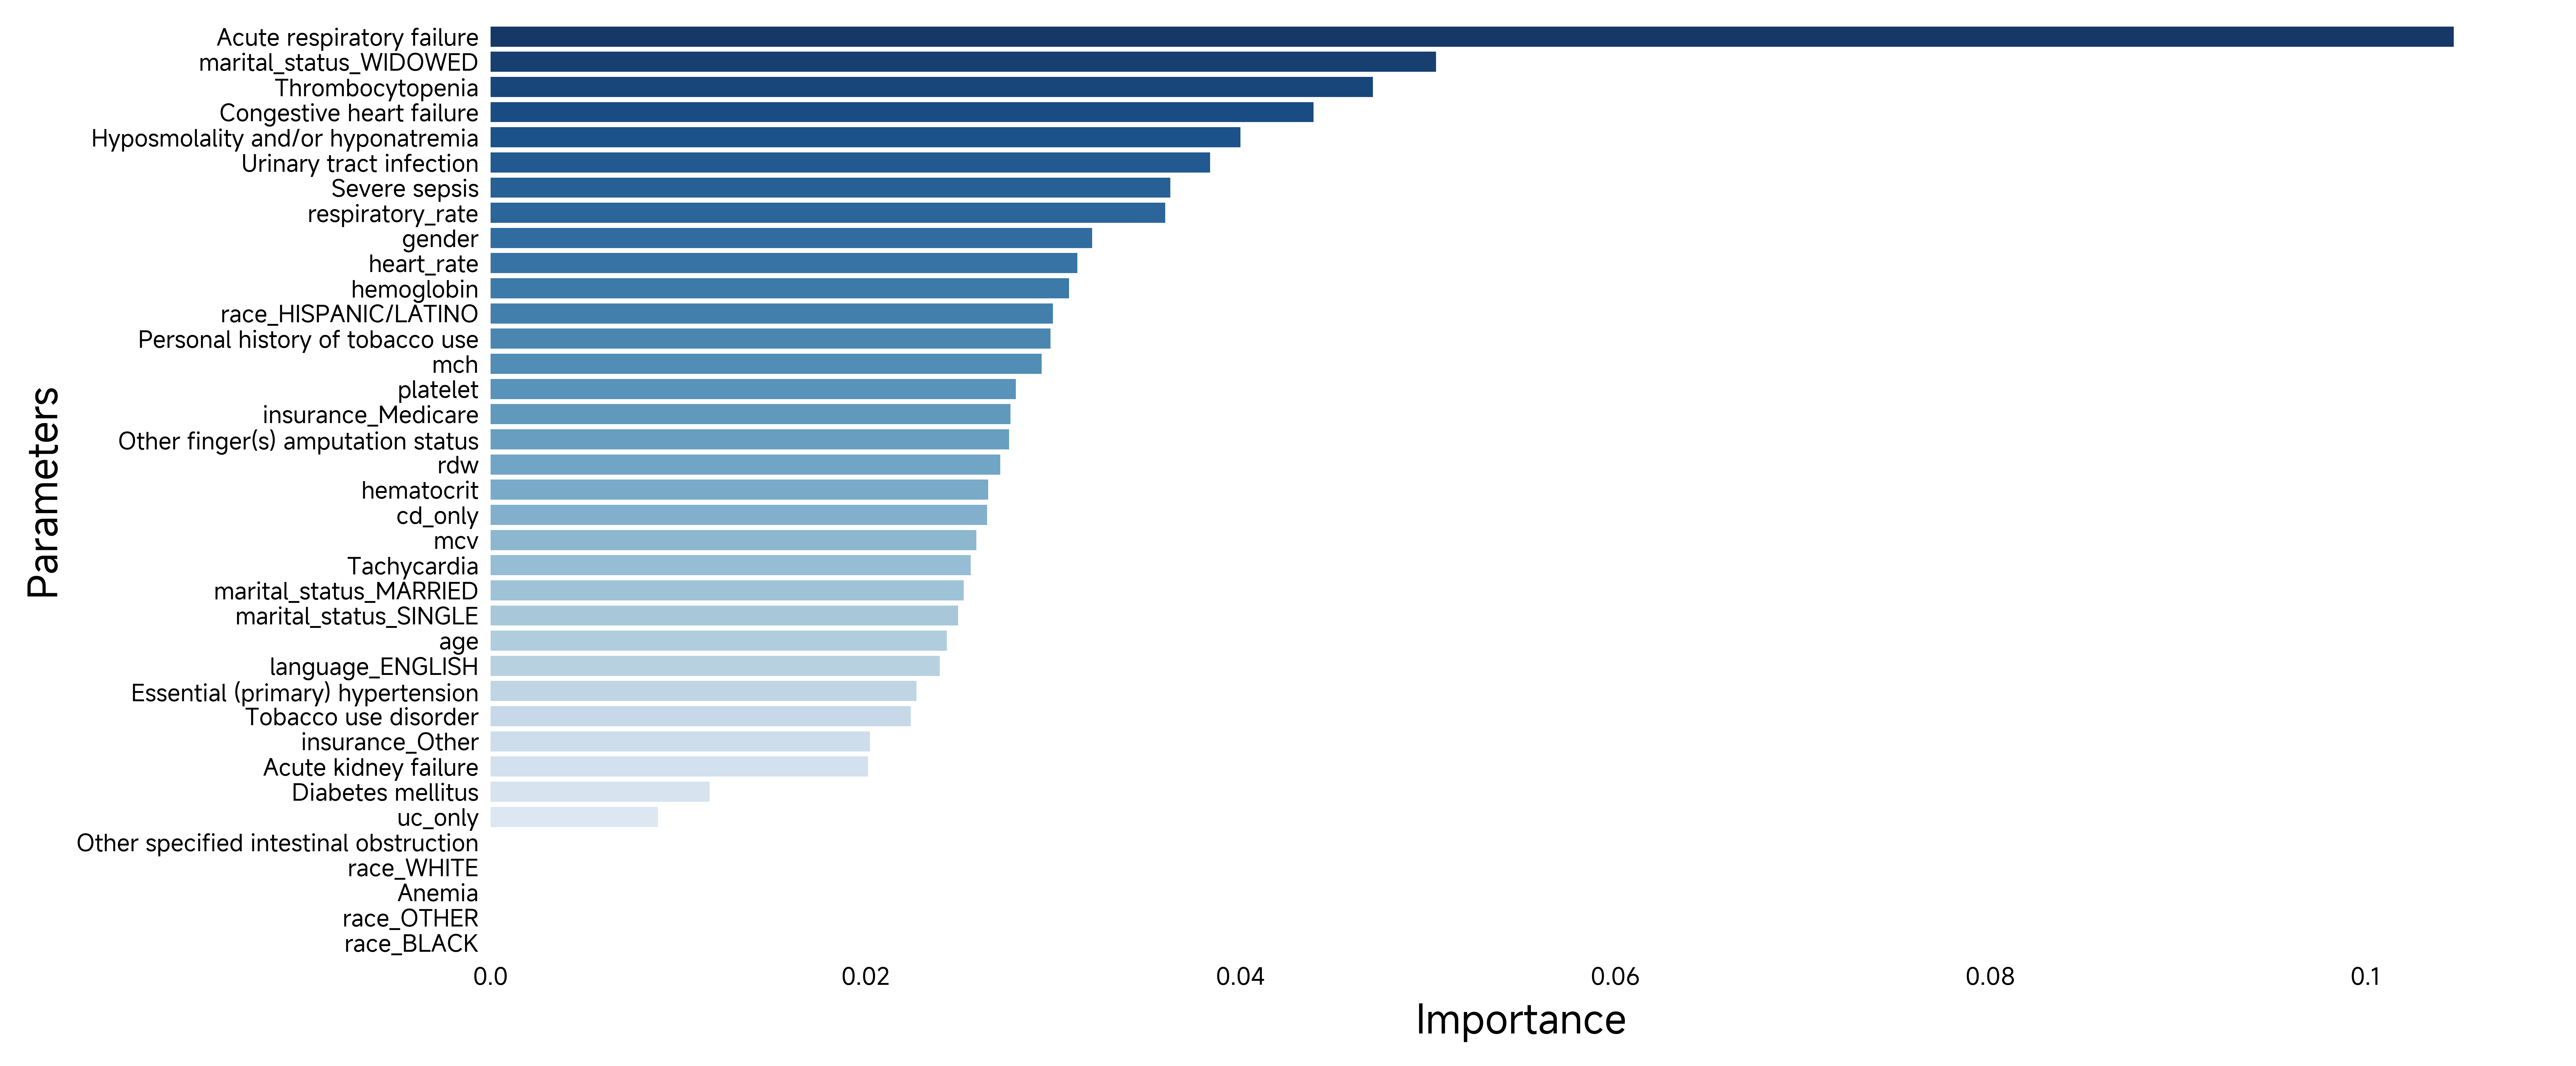

In [21]:
plt.figure(figsize=(11, 5), dpi=900)



    
sns.barplot(
    data=importance_df,
    x='Importance',
    y='index',
    palette='Blues_r'
)

sans_font = FontProperties(
    fname=r'C:\Users\sitdo\AppData\Local\Microsoft\Windows\Fonts\MiSans VF.ttf',
    size=12,
)

plt.ylabel('Parameters', fontproperties=sans_font)
plt.xlabel('Importance', fontproperties=sans_font)



sans_font = FontProperties(
    fname=r'C:\Users\sitdo\AppData\Local\Microsoft\Windows\Fonts\MiSans VF.ttf',
    size=7,
    # weight='bold',
)

# 获取当前轴
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# ax.set_yticklabels([])
ax.tick_params(axis='both',          # 应用于 x 和 y 轴
                    which='both',         # 应用于主要和次要刻度
                    length=0)             # 刻度线长度设置为 0


# 设置x轴和y轴的字体属性
ax.set_xticklabels(ax.get_xticks(), fontproperties=sans_font)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=sans_font)

plt.show()